# Strategy 

In [96]:
import pandas as pd 
from datetime import datetime
import numpy as np
import tarfile
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from clustering import *
from tqdm import tqdm

In [97]:
# autoreload    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
tar_file_path = 'data/period_data.tar'

period_data = load_clean_data(tar_file_path)

In [80]:
after_15_30 = period_data.copy()
after_15_30 = after_15_30.pivot_table(index='xltime', columns='stock', values='price', aggfunc='mean')
after_15_30.index = pd.to_datetime(after_15_30.index)
after_15_30 = after_15_30[after_15_30.index.time >= datetime.strptime('15:30', '%H:%M').time()]

after_15_30

stock,CORN,CPER,DBC,EDEN,EFNL,EIS,EUSA,EWA,EWC,EWD,...,WEAT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
xltime,,,,,,,,,,,,,,,,,,,,,
2012-03-01 15:30:00-05:00,41.033056,27.770960,29.832446,NaN,NaN,40.948824,29.656403,23.915227,29.306671,29.565486,...,NaN,37.362520,75.544803,14.894215,37.315204,29.090772,33.124608,34.901217,36.343785,43.480585
2012-03-01 15:31:00-05:00,41.017398,27.733922,29.842285,NaN,NaN,40.956000,29.641789,23.914424,29.302070,29.566527,...,NaN,37.353526,75.537508,14.892514,37.302899,29.080492,33.125699,34.903048,36.334793,43.474528
2012-03-01 15:32:00-05:00,41.015000,NaN,29.837190,NaN,NaN,40.953614,29.630391,23.893736,29.291755,29.546538,...,NaN,37.349301,75.493080,14.886596,37.282500,29.063336,33.125541,34.892732,36.323034,43.452650
2012-03-01 15:33:00-05:00,41.034524,NaN,29.841112,NaN,NaN,40.954885,29.624704,23.891378,29.290477,29.549722,...,NaN,37.342737,75.449532,14.882629,37.284003,29.055546,33.121034,34.885636,36.326393,43.445390
2012-03-01 15:34:00-05:00,NaN,NaN,29.847432,NaN,NaN,40.984286,29.604700,23.883197,29.288573,29.544439,...,NaN,37.322275,75.442049,14.875168,37.282409,29.043156,33.113613,34.875502,36.322117,43.434583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 15:55:00-05:00,44.306397,25.403571,27.759922,NaN,NaN,42.023646,30.643805,25.132337,28.437938,30.169319,...,21.319688,37.542730,71.363469,16.389956,37.890515,28.911507,34.857224,34.931154,39.897075,47.424936
2012-12-31 15:56:00-05:00,44.326222,25.396667,27.764300,31.852928,26.210588,42.035635,30.608323,25.108559,28.425477,30.149678,...,21.296429,37.514376,71.313814,16.378376,37.866717,28.889811,34.843864,34.915377,39.874200,47.392575
2012-12-31 15:57:00-05:00,44.326667,25.391667,27.765539,31.930000,26.069091,NaN,30.625325,25.095958,28.398757,30.139777,...,21.304027,37.482111,71.264554,16.368399,37.831159,28.857766,34.822122,34.878850,39.849054,47.360134


In [81]:
from strategy import compute_log_returns_eod

log_ret = compute_log_returns_eod(after_15_30)


In [90]:
# Rename index to Day and set as datetime
log_ret.index = log_ret.index.rename('Day')
log_ret.index = pd.to_datetime(log_ret.index)
log_ret

stock,CORN,CPER,DBC,EDEN,EFNL,EIS,EUSA,EWA,EWC,EWD,...,WEAT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Day,,,,,,,,,,,,,,,,,,,,,
2012-03-01,0.000785,0.000185,-0.002257,NaN,NaN,0.001003,0.001239,-0.000085,0.000750,0.000990,...,NaN,0.001364,0.001245,0.002917,0.001158,0.001203,0.002075,0.002773,0.001322,0.002051
2012-03-02,0.001395,0.003750,0.000450,-0.010103,-0.009730,-0.001240,-0.002135,-0.000361,-0.001360,-0.000110,...,0.002843,-0.001538,-0.000405,-0.001755,-0.001376,-0.001144,-0.001381,-0.002232,-0.001320,-0.001506
2012-03-05,0.003654,-0.010037,0.000007,0.000000,-0.004407,-0.004815,-0.004104,-0.000240,-0.000828,-0.000581,...,0.001737,0.000045,-0.000394,-0.000403,-0.000737,-0.002086,-0.000763,-0.000590,-0.000596,-0.002322
2012-03-06,-0.013101,-0.030618,0.000780,-0.045142,-0.039201,-0.000322,0.000778,0.002374,0.001023,-0.000014,...,0.000000,0.001450,0.003446,0.001285,0.001275,0.001305,-0.000247,0.000742,0.000258,0.001058
2012-03-07,-0.000094,0.005692,-0.000280,0.000119,0.014031,-0.000330,-0.000659,0.000184,0.000583,0.001067,...,0.000000,-0.001604,-0.001471,0.000446,-0.001381,0.000341,-0.000649,-0.000653,-0.000969,-0.001148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.010668,0.000000,-0.002562,0.723342,0.011415,-0.000429,-0.003538,0.000000,0.818286
2012-12-26,-0.012696,-0.000166,0.000224,-0.000362,0.006826,-0.002854,-0.001233,-0.001739,0.000147,-0.000854,...,-0.000589,0.000355,-0.002107,-0.001260,-0.001396,-0.001395,-0.000721,-0.001700,-0.001889,-0.001332
2012-12-27,0.000077,0.002162,0.000132,-0.000866,0.005429,0.001299,0.001543,-0.000975,0.000479,0.000302,...,-0.002977,0.001064,0.002324,0.002257,0.001376,0.001574,0.000092,0.001594,0.000164,0.000954


In [194]:
#load clusters data use day as index
#clusters = pd.read_csv('data/clusters.csv', index_col=0)
#clusters.index = pd.to_datetime(clusters.index)

#new clusters 
clusters = pd.read_csv('data/output.csv', index_col=0)
clusters.index = pd.to_datetime(clusters.index)


In [195]:
clusters

,Cluster
Day,
2012-03-01,0
2012-03-02,1
2012-03-05,1
2012-03-06,1
2012-03-07,1
...,...
2012-12-24,3
2012-12-26,3
2012-12-27,3


In [207]:
from strategy import * 

def rolling_backtest(states_df, trades_df, min_window_size=30, strat="ten", quantile=0.1):
    """
    Performs a rolling window backtest of the investment strategy.

    Parameters:
    - strategy_func: Function to apply the investment strategy
    - states_df: DataFrame with market states for each day
    - trades_df: DataFrame with log returns for each stock per day
    - window_size: Number of past days to consider in the rolling window
    - strat: The investment strategy to use (e.g., 'ten', 'w_ret', etc.)
    - quantile: Percentage of top and bottom stocks to long and short (default 10%)

    Returns:
    - results_df: DataFrame containing portfolio returns for each day in the test period
    """
    results = []

    for i in tqdm(range(min_window_size, len(states_df))):
        
        # Select rolling window for states and trades
        rolling_states = states_df.iloc[: i + 1]
        rolling_return = trades_df.iloc[: i + 1]

        # Call the investment strategy function
        weights = investment_strategy(strat, rolling_states, rolling_return, min_window_size, quantile)

        # Compute portfolio return using today's actual returns (excluding the last day)
        portfolio_return = compute_portfolio_return(weights, rolling_return.iloc[-1])

        results.append({'date': states_df.index[i], 'portfolio_return': portfolio_return})

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Compute cumulative return for performance evaluation
    results_df['cumulative_return'] = (1 + results_df['portfolio_return']).cumprod()

    return results_df


In [218]:
results_ten = rolling_backtest(clusters, log_ret, min_window_size=30, strat="ten", quantile=0.1)

  2%|▏         | 3/180 [00:00<00:07, 23.87it/s]

  9%|▉         | 16/180 [00:00<00:04, 38.59it/s]/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
100%|██████████| 180/180 [00:02<00:00, 82.27it/s] 


In [219]:
results_ten

,date,portfolio_return,cumulative_return
0,2012-04-13,-0.000879,0.999121
1,2012-04-16,0.001256,1.000376
2,2012-04-17,-0.000579,0.999796
3,2012-04-18,0.012088,1.011882
4,2012-04-19,0.005051,1.016993
...,...,...,...
175,2012-12-24,-0.002294,1.785190
176,2012-12-26,-0.001915,1.781771
177,2012-12-27,-0.003016,1.776397
178,2012-12-28,0.003692,1.782955


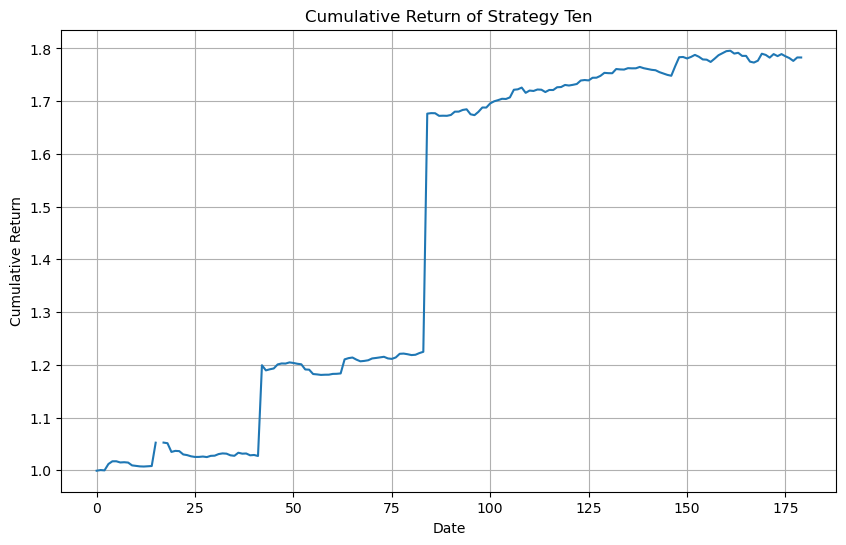

In [220]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(results_ten['cumulative_return'])
plt.title('Cumulative Return of Strategy Ten')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()


In [221]:
results_w_ret = rolling_backtest(clusters, log_ret, min_window_size=30, strat="w_ret", quantile=0.1)

  0%|          | 0/180 [00:00<?, ?it/s]/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
100%|██████████| 180/180 [00:00<00:00, 181.72it/s]


In [222]:
results_w_ret

,date,portfolio_return,cumulative_return
0,2012-04-13,-0.053483,0.946517
1,2012-04-16,-0.028254,0.919774
2,2012-04-17,0.015645,0.934165
3,2012-04-18,-0.009795,0.925014
4,2012-04-19,-0.010390,0.915404
...,...,...,...
175,2012-12-24,-0.209043,3.766177
176,2012-12-26,-0.002244,3.757724
177,2012-12-27,-0.003111,3.746032
178,2012-12-28,0.033109,3.870058


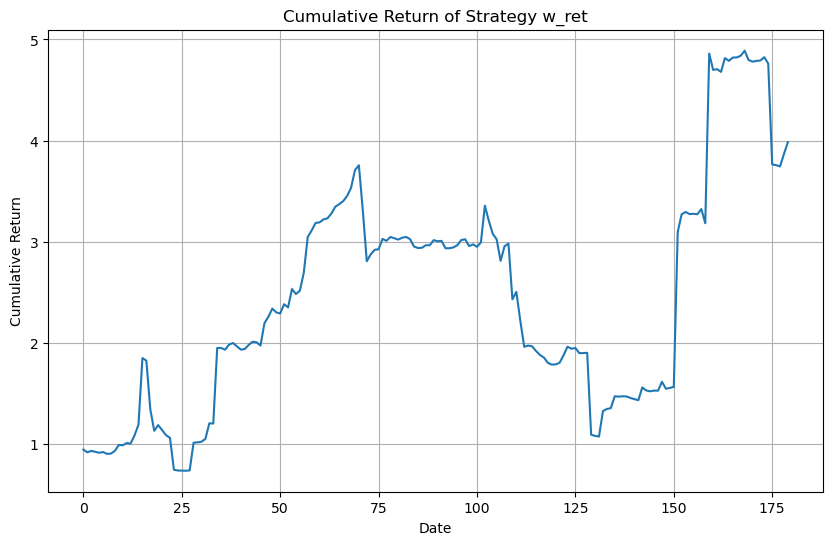

In [223]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(results_w_ret['cumulative_return'])
plt.title('Cumulative Return of Strategy w_ret')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [224]:
returns_top_bottom = rolling_backtest(clusters, log_ret, min_window_size=30, strat="top_bottom", quantile=0.25)

  7%|▋         | 13/180 [00:00<00:01, 120.82it/s]

/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
100%|██████████| 180/180 [00:01<00:00, 116.63it/s]


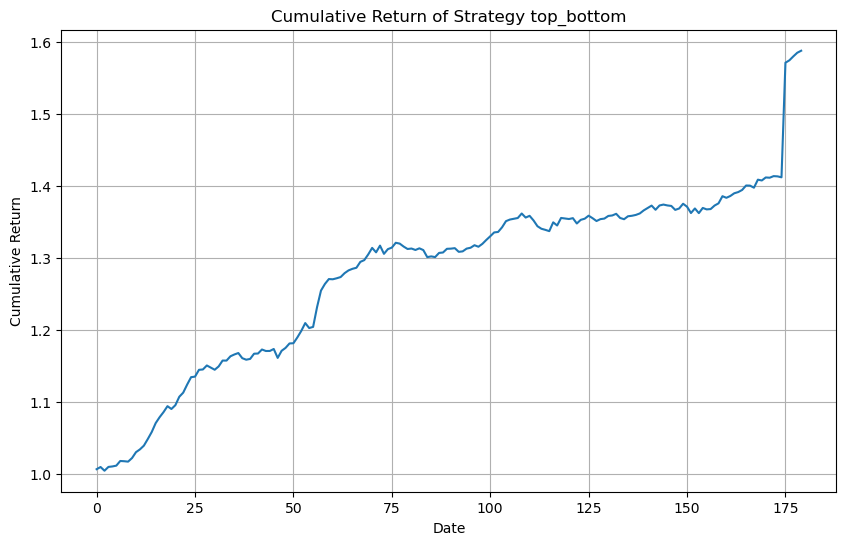

In [225]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(returns_top_bottom['cumulative_return'])
plt.title('Cumulative Return of Strategy top_bottom')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [226]:
returns_momentum = rolling_backtest(clusters, log_ret, min_window_size=30, strat="momentum", quantile=0.1)

  0%|          | 0/180 [00:00<?, ?it/s]/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
  9%|▉         | 17/180 [00:00<00:00, 164.45it/s]

100%|██████████| 180/180 [00:01<00:00, 172.53it/s]


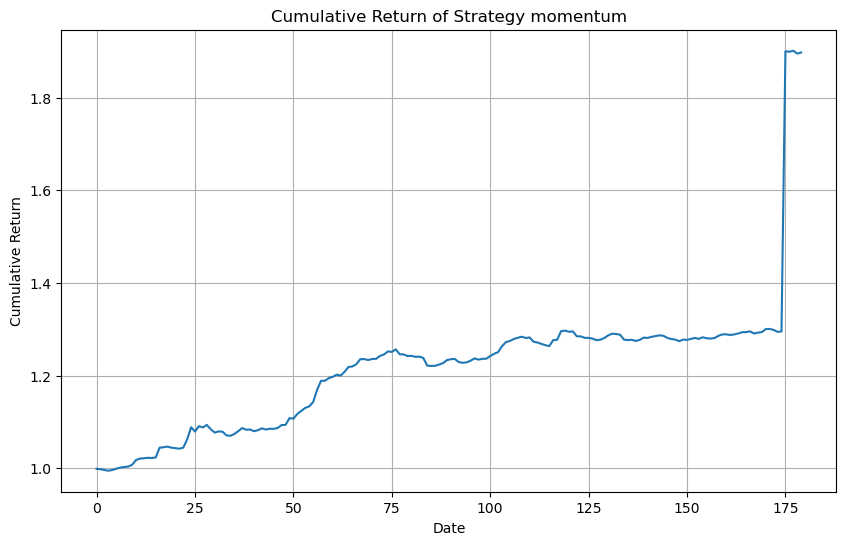

In [227]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(returns_momentum['cumulative_return'])
plt.title('Cumulative Return of Strategy momentum')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [228]:
returns_risk_parity = rolling_backtest(clusters, log_ret, min_window_size=30, strat="risk_parity", quantile=0.1)

  7%|▋         | 13/180 [00:00<00:01, 123.01it/s]/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mpittelo/miniconda3/envs/fbd/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
 33%|███▎      | 60/180 [00:00<00:00, 144.96it/s]

100%|██████████| 180/180 [00:01<00:00, 148.90it/s]


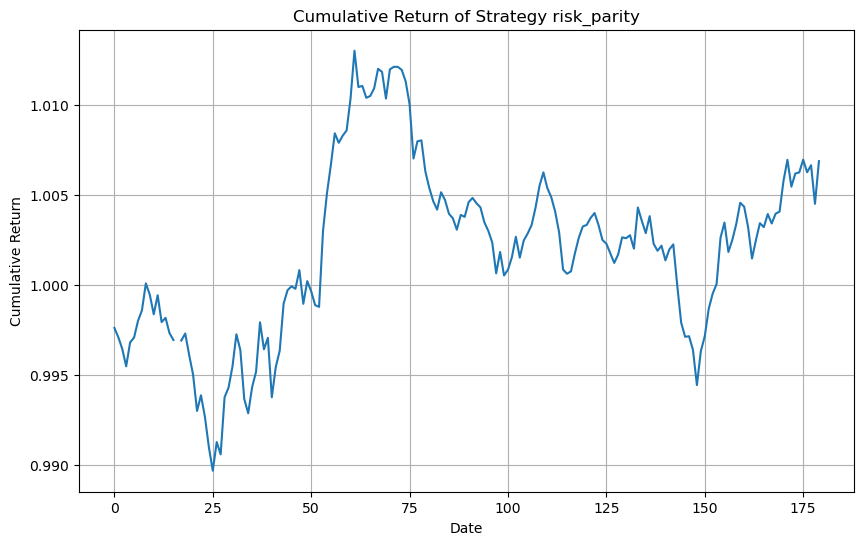

In [229]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(returns_risk_parity['cumulative_return'])
plt.title('Cumulative Return of Strategy risk_parity')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

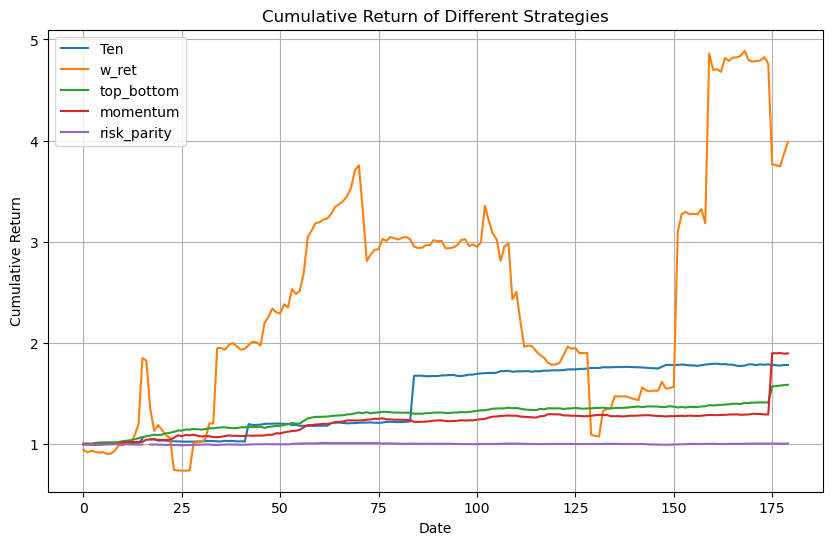

In [230]:
# plot all in one graph with legends
plt.figure(figsize=(10, 6))
plt.plot(results_ten['cumulative_return'], label='Ten')
plt.plot(results_w_ret['cumulative_return'], label='w_ret')
plt.plot(returns_top_bottom['cumulative_return'], label='top_bottom')
plt.plot(returns_momentum['cumulative_return'], label='momentum')
plt.plot(returns_risk_parity['cumulative_return'], label='risk_parity')
plt.title('Cumulative Return of Different Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()